In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

In [2]:
paths = {'O':'data/ADP.2020-03-13T01_07_32.795.fits',
         'B':'data/ADP.2015-07-29T14_00_01.480.fits',
         'K':'data/ADP.2019-01-21T00_00_03.251.fits',
         'M':'data/ADP.2019-05-01T09_35_49.464.fits'}

In [3]:
fps = {}
for spectral_class in paths:
    fps[spectral_class] = fits.open(paths[spectral_class])

In [4]:
#   what's inside?
for spectral_class in fps:
    print(f'spectral class {spectral_class}')
    print(fps[spectral_class].info())
    print()

spectral class O
Filename: data/ADP.2020-03-13T01_07_32.795.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    3374   ()      
  1  SPECTRUM      1 BinTableHDU     46   1R x 3C   [313090D, 313090E, 313090E]   
None

spectral class B
Filename: data/ADP.2015-07-29T14_00_01.480.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     607   ()      
  1  SPECTRUM      1 BinTableHDU     70   1R x 6C   [85457D, 85457E, 85457E, 85457E, 85457E, 85457E]   
None

spectral class K
Filename: data/ADP.2019-01-21T00_00_03.251.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     545   ()      
  1  SPECTRUM      1 BinTableHDU     53   1R x 6C   [10220D, 10220D, 10220D, 10220J, 10220J, 10220D]   
None

spectral class M
Filename: data/ADP.2019-05-01T09_35_49.464.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHD

In [5]:
#   what file metadata is available?
print(list(fps['O'][0].header.keys()))

['SIMPLE', 'BITPIX', 'NAXIS', 'EXTEND', 'COMMENT', 'COMMENT', 'DATE', 'INSTRUME', 'RA', 'DEC', 'EQUINOX', 'RADECSYS', 'EXPTIME', 'MJD-OBS', 'DATE-OBS', 'UTC', 'LST', 'PI-COI', 'OBSERVER', 'ORIGIN', 'TELESCOP', 'M_EPOCH', 'SINGLEXP', 'PRODLVL', 'DISPELEM', 'SPECSYS', 'OBJECT', 'TEXPTIME', 'EXT_OBJ', 'MJD-END', 'PROG_ID', 'OBID1', 'PROCSOFT', 'OBSTECH', 'PRODCATG', 'FLUXCAL', 'CONTNORM', 'WAVELMIN', 'WAVELMAX', 'SPEC_BIN', 'TOT_FLUX', 'FLUXERR', 'NCOMBINE', 'REFERENC', 'SNR', 'SPEC_RES', 'GAIN', 'DETRON', 'ASSOC1', 'ASSON1', 'ASSOM1', 'PROV1', 'ESO ADA ABSROT END', 'ESO ADA ABSROT START', 'ESO ADA GUID DEC', 'ESO ADA GUID RA', 'ESO ADA GUID STATUS', 'ESO ADA POSANG', 'ESO DET BITS', 'ESO DET CHIPS', 'ESO DET DATE', 'ESO DET DEC', 'ESO DET DID', 'ESO DET EXP NO', 'ESO DET EXP RDTTIME', 'ESO DET EXP TYPE', 'ESO DET EXP XFERTIM', 'ESO DET FRAM ID', 'ESO DET FRAM TYPE', 'ESO DET ID', 'ESO DET NAME', 'ESO DET OUTPUTS', 'ESO DET OUTREF', 'ESO DET RA', 'ESO DET READ CLOCK', 'ESO DET READ MODE',

In [6]:
#   some important metadata
for spectral_class in fps:
    header = fps[spectral_class][0].header
    print(f'spectral class {spectral_class}')
    print(f"name\t{header['ESO OBS NAME']}")
    print(f"telescope\t{header['TELESCOP']}")
    print(f"instrument\t{header['INSTRUME']}")
    print(f"spectral resolution\t{header['SPEC_RES']}")
    print(f"date\t{header['DATE-OBS']}")
    print(f"modified Julian date\t{header['MJD-OBS']}")
    print(f"exposure time\t{header['EXPTIME']}")
    print(f"air mass\t{header['ESO OBS AIRM']}")
    print()

spectral class O
name	HR1996-EGGS---06hrs
telescope	ESO-3.6
instrument	HARPS
spectral resolution	80000.0
date	2020-03-12T01:50:09.288
modified Julian date	58920.07649639
exposure time	92.9998
air mass	5.0

spectral class B
name	HD158926_dic2_1
telescope	ESO-VLT-U2
instrument	UVES
spectral resolution	71050.0
date	2015-07-21T01:03:24.380
modified Julian date	57224.044032186
exposure time	0.7019
air mass	2.0

spectral class K
name	Alf_Cen_B_GIR_4setups
telescope	ESO-VLT-U2
instrument	GIRAFFE
spectral resolution	18000.0
date	2014-07-17T23:36:27.658
modified Julian date	56855.983653458
exposure time	10.0
air mass	5.0

spectral class M
name	gam_Sge_HR10_15N_21
telescope	ESO-VLT-U2
instrument	GIRAFFE
spectral resolution	18000.0
date	2012-04-30T09:56:44.968
modified Julian date	56047.414409353
exposure time	1.0035
air mass	5.0



In [7]:
#   what metadata is available on the data?
print(list(fps['O'][1].header.keys()))

['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT', 'TFIELDS', 'TTYPE1', 'TFORM1', 'TTYPE2', 'TFORM2', 'TTYPE3', 'TFORM3', 'VOCLASS', 'VOPUB', 'EXTNAME', 'INHERIT', 'TITLE', 'OBJECT', 'RA', 'DEC', 'APERTURE', 'TELAPSE', 'TMID', 'NELEM', 'SPEC_VAL', 'SPEC_BW', 'TUTYP1', 'TUCD1', 'TUNIT1', 'TCOMM1', 'TDMIN1', 'TDMAX1', 'TUTYP2', 'TUCD2', 'TUNIT2', 'TCOMM2', 'TDMIN2', 'TDMAX2', 'TUTYP3', 'TUCD3', 'TUNIT3', 'TCOMM3', 'CHECKSUM', 'DATASUM']


In [8]:
data = {}
for spectral_class in fps:
    data[spectral_class] = fps[spectral_class][1].data[0]
#   GIRAFFE meaures in nm, I want Å
data['K'][0] *= 10
data['M'][0] *= 10

In [9]:
for spectral_class in data:
    print(f'spectral class {spectral_class}')
    print(f'data entries {len(data[spectral_class][0])}')
    print()

spectral class O
data entries 313090

spectral class B
data entries 85457

spectral class K
data entries 10220

spectral class M
data entries 10220



In [10]:
#   low resolution manual spline fit data
spline_points_wavelength = {'O':[3800, 4000, 4300, 4500, 5000, 5500, 6000, 6500, 7000],
                            'B':[3800, 3900, 4000, 4100, 4200, 4300, 4400, 4600, 4800, 5000],
                            'K':[8500, 8700, 8900, 9100],
                            'M':[8500, 8700, 8900, 9100]}
spline_points_flux = {'O':[5000, 15000, 27000, 30000, 35000, 30000, 22000, 17000, 12000],
                      'B':[7100, 7000, 7000, 7100, 9000, 9000, 10000, 11000, 8000, 5000],
                      'K':[250000, 250000, 250000, 250000],
                      'M':[5800, 6000, 6000, 5900]}

splines           = {}
ranges_wavelength = {}
ranges_flux       = {}
splines_flux      = {}
for spectral_class in data:
    #   spline fit
    splines[spectral_class] = splrep(spline_points_wavelength[spectral_class], spline_points_flux[spectral_class], k = 3)
    ranges_wavelength[spectral_class] = np.linspace(np.min(data[spectral_class][0]), np.max(data[spectral_class][0]), len(data[spectral_class][0]))
    #   evaluate along spline
    splines_flux[spectral_class] = splev(ranges_wavelength[spectral_class], splines[spectral_class])

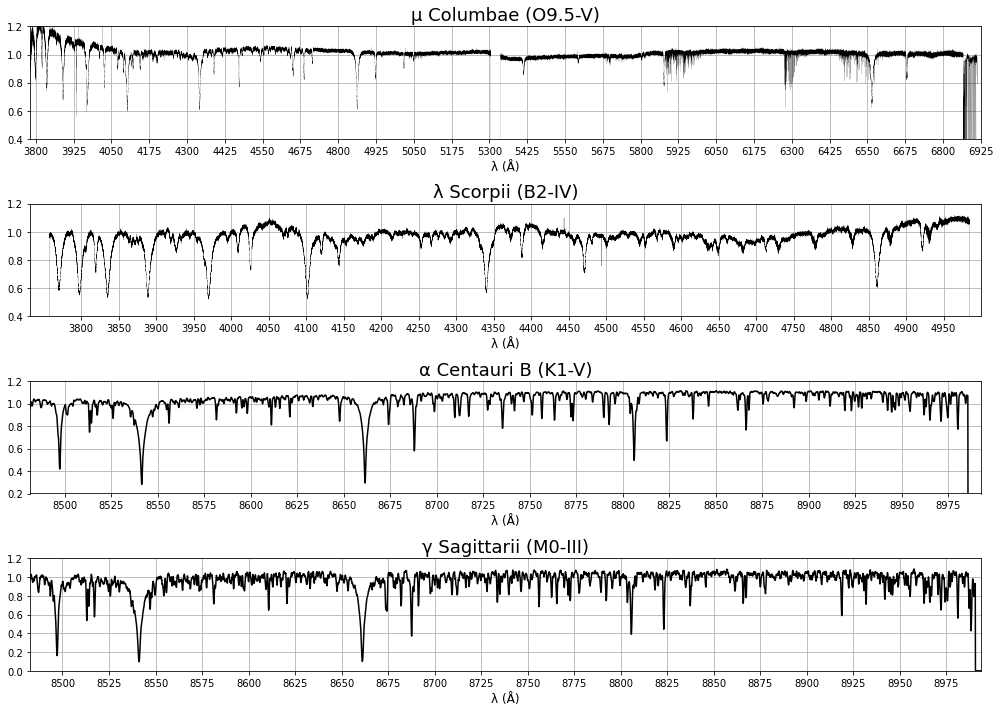

In [11]:
fig = plt.figure(figsize = (14, 10))
axs    = {'O':fig.add_subplot(411),
          'B':fig.add_subplot(412),
          'K':fig.add_subplot(413),
          'M':fig.add_subplot(414)}
lws    = {'O':0.1,        'B':0.2,        'K':1.5,        'M':1.5}
y_lims = {'O':[0.5, 1.2], 'B':[0.4, 1.2], 'K':[0.2, 1.2], 'M':[0, 1.2]}
ticks  = {'O':[np.arange(3800, 7000, 125), np.arange(0.4, 1.4, 0.2)],
          'B':[np.arange(3800, 5000, 50),  np.arange(0.4, 1.4, 0.2)],
          'K':[np.arange(8500, 9000, 25),  np.arange(0.2, 1.4, 0.2)],
          'M':[np.arange(8500, 9000, 25),  np.arange(0, 1.4, 0.2)]}
titles = {'O':'μ Columbae (O9.5-V)',
          'B':'λ Scorpii (B2-IV)',
          'K':'α Centauri B (K1-V)',
          'M':'γ Sagittarii (M0-III)'}

for spectral_class in axs:
    ax = axs[spectral_class]
    ax.plot(data[spectral_class][0], data[spectral_class][1] / splines_flux[spectral_class], c = 'black', lw = lws[spectral_class])
    ax.set_xlim(ranges_wavelength[spectral_class][0], ranges_wavelength[spectral_class][-1])
    ax.set_ylim(y_lims[spectral_class])
    ax.set_xticks(ticks[spectral_class][0])
    ax.set_yticks(ticks[spectral_class][1])
    ax.set_title(titles[spectral_class], size = 18)
    ax.set_xlabel('λ (Å)', size = 12)
    ax.grid()

plt.tight_layout()
plt.show()